
    Trabajar sobre la brecha de género : hue= género

    ¿Cuál es la edad media de un analita de datos en el mundo? y ¿cuál de España?

    ¿Cuál es la educación y el cargo que ocupan en el mundo Tech? y ¿cuál de España y países


In [1]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable

In [2]:
pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [3]:
df = pd.read_csv("../data/6.dataframe_analisis.csv", index_col = 0)

# Se hace esto para resetear los índices
df.reset_index(drop=True , inplace=True)
df.head(2)

,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q26_ppto_ml_cc,q33_bigdata_product,q35_h_i_negocios,q41_h_process_data,q7_l_utilizados,q9_adi,q14_h_viz,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",$0 ($USD),NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


In [4]:
lista_eliminar= ['q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q26_ppto_ml_cc', 'q33_bigdata_product', 'q35_h_i_negocios',
       'q41_h_process_data', 'q7_l_utilizados', 'q9_adi', 'q14_h_viz',
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2',
       'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other',
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4', 'q39_part_5',
       'q39_part_6', 'q39_part_7', 'q39_part_8', 'q39_part_9', 'q39_other',
       'q40_part_1', 'q40_part_2', 'q40_part_3', 'q40_part_4', 'q40_part_5',
       'q40_part_6', 'q40_part_7', 'q40_part_8', 'q40_part_9', 'q40_part_10',
       'q40_part_11', 'q40_other', 'q42_part_1', 'q42_part_2', 'q42_part_3',
       'q42_part_4', 'q42_part_5', 'q42_part_6', 'q42_part_7', 'q42_part_8',
       'q42_part_9', 'q42_part_10', 'q42_part_11', 'q42_other']

In [5]:
df_perfil = df.drop(columns = lista_eliminar, axis=1)

In [23]:
df_perfil['genero_new'] = df_perfil['q2_genero'].replace({
'Man': 'Man', 
'Woman': 'Woman', 
'Prefer to self-describe': 'Others', 
'Nonbinary': 'Others', 
'Prefer not to say': 'Others'}) 

In [90]:
df_perfil['q1_edad'].unique()

array(['50-54', '22-24', '45-49', '25-29', '18-21', '30-34', '40-44',
       '35-39', '70+', '55-59', '60-69'], dtype=object)

In [92]:
df_perfil['q2_edad_new'] = df_perfil['q1_edad'].replace({
'50-54': '50-59', 
'22-24': '22-29', 
'25-29': '22-29',
'18-21': '<22',
'30-34': '30-39', 
'40-44': '40-49',
'45-49' : '40-49',
'35-39': '30-39',
'70+':'70+',
'55-59': '50-59',
'60-69':'60-69'}) 

In [86]:
df_perfil.columns

Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'genero_new', 'edad_new', 'q2_edad_new'],
      dtype='object')

In [93]:
df_analista = df_perfil[df_perfil['q5_ocupacion'] == 'Data Analyst']

In [85]:
df_analista

,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech,genero_new,edad_new,q2_edad_new
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,Man,50-59,50-59
32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,Others,22-29,22-29
33,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,Woman,30-39,30-39
46,22-24,Man,China,Some college/university study without earning ...,Data Analyst,< 1 years,Man,22-29,22-29
52,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3 years,Man,40-49,40-49
...,...,...,...,...,...,...,...,...,...
25954,25-29,Man,India,Professional doctorate,Data Analyst,< 1 years,Man,22-29,22-29
25959,18-21,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Man,<22,<22
25965,18-21,Man,India,Master’s degree,Data Analyst,1-3 years,Man,<22,<22
25966,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Man,30-39,30-39


In [70]:
df_perfil['genero_new'] = df_perfil['q2_genero'].replace({
'Man': 'Man', 
'Woman': 'Woman', 
'Prefer to self-describe': 'Others', 
'Nonbinary': 'Others', 
'Prefer not to say': 'Others'}) 



In [94]:
df_españa_final = df_analista[df_analista['q3_país'] == 'Spain']

In [42]:
df_fre_mundo = df_analista.stb.freq(['q1_edad'])

In [28]:
df_v_mundo=pd.DataFrame(df_analista['q1_edad'].value_counts()).reset_index()


,index,q1_edad
0,25-29,588
1,30-34,420
2,22-24,419
3,35-39,280
4,18-21,191
5,40-44,163
6,45-49,105
7,50-54,67
8,55-59,32
9,60-69,28


In [ ]:
df_v_esp=pd.DataFrame(df_analista_españa['q1_edad'].value_counts()).reset_index()


In [44]:
df_fre_esp = df_analista_españa.stb.freq(['q1_edad'])

In [46]:
df_fre_mundo.columns

Index(['q1_edad', 'count', 'percent', 'cumulative_count',
       'cumulative_percent'],
      dtype='object')

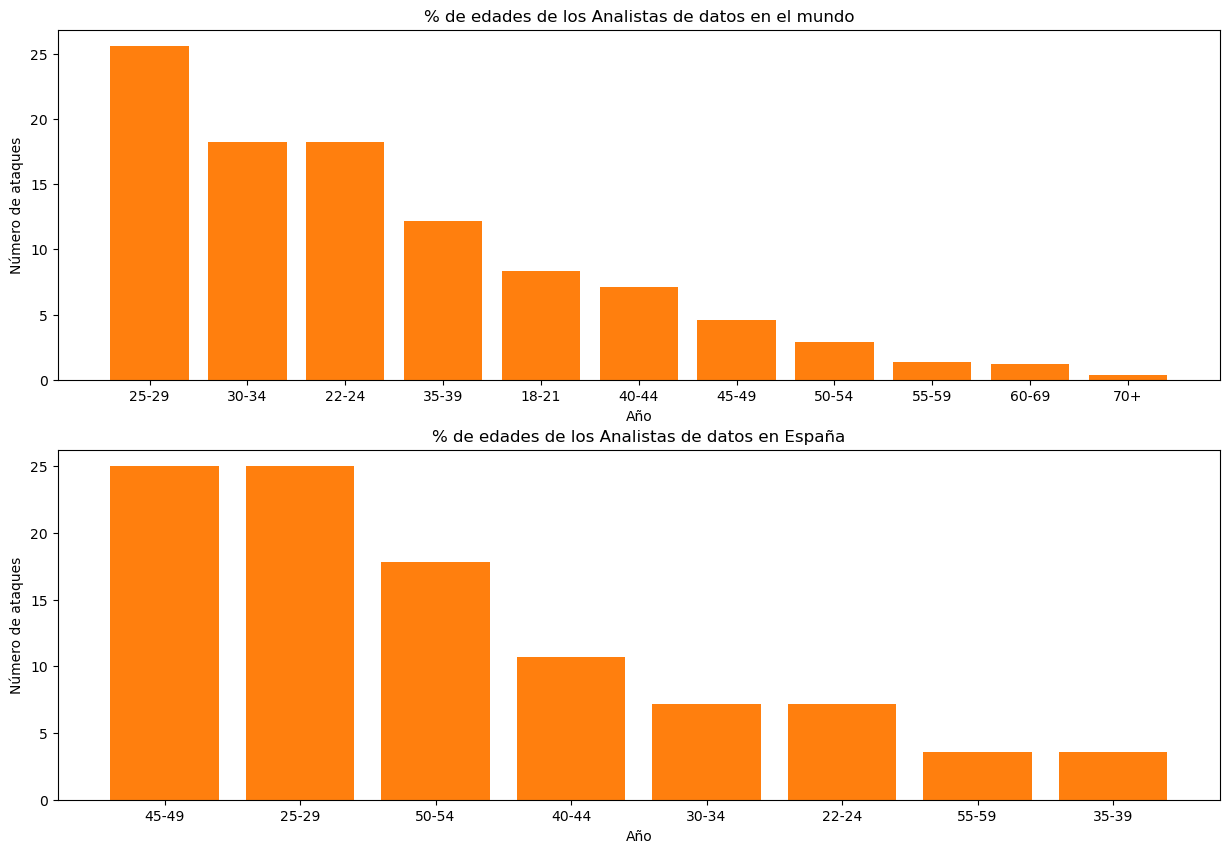

In [51]:


fig,ax = plt.subplots(2,1, figsize = (15,10))

ax[0].bar(df_fre_mundo["q1_edad"], df_fre_mundo["percent"], color='tab:orange', label = 'Global')

ax[1].bar(df_fre_esp["q1_edad"], df_fre_esp["percent"], color='tab:orange', label = 'España')


# en este caso vamos a ampliar los límites de los ejes

#ax[0].set_xlim(1750,2020)
#ax[1].set_xlim(1750,2020)

# para poner los títulos usaremos el método set_title
ax[0].set_title("% de edades de los Analistas de datos en el mundo")
ax[1].set_title("% de edades de los Analistas de datos en España")

# cambiamos el nombre de los ejes x e y

ax[0].set_xlabel("Año")
ax[0].set_ylabel("Número de ataques")

ax[1].set_xlabel("Año")
ax[1].set_ylabel("Número de ataques")


# mostramos lo que nos devuelve esto: 
plt.show()

# El siguiente código guarda la imagen a través del método .savefig()
#plt.savefig('Visualizacion-II/2.Evolución temporal del número de ataques en España y en Estados Unidos.jpg')



In [57]:
df_analista.columns

Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'genero_new'],
      dtype='object')

In [68]:
df_perfil['q1_edad'].unique()

array(['50-54', '22-24', '45-49', '25-29', '18-21', '30-34', '40-44',
       '35-39', '70+', '55-59', '60-69'], dtype=object)

In [60]:
df_españa_final.columns

Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'genero_new'],
      dtype='object')

/tmp/ipykernel_67462/2095352385.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


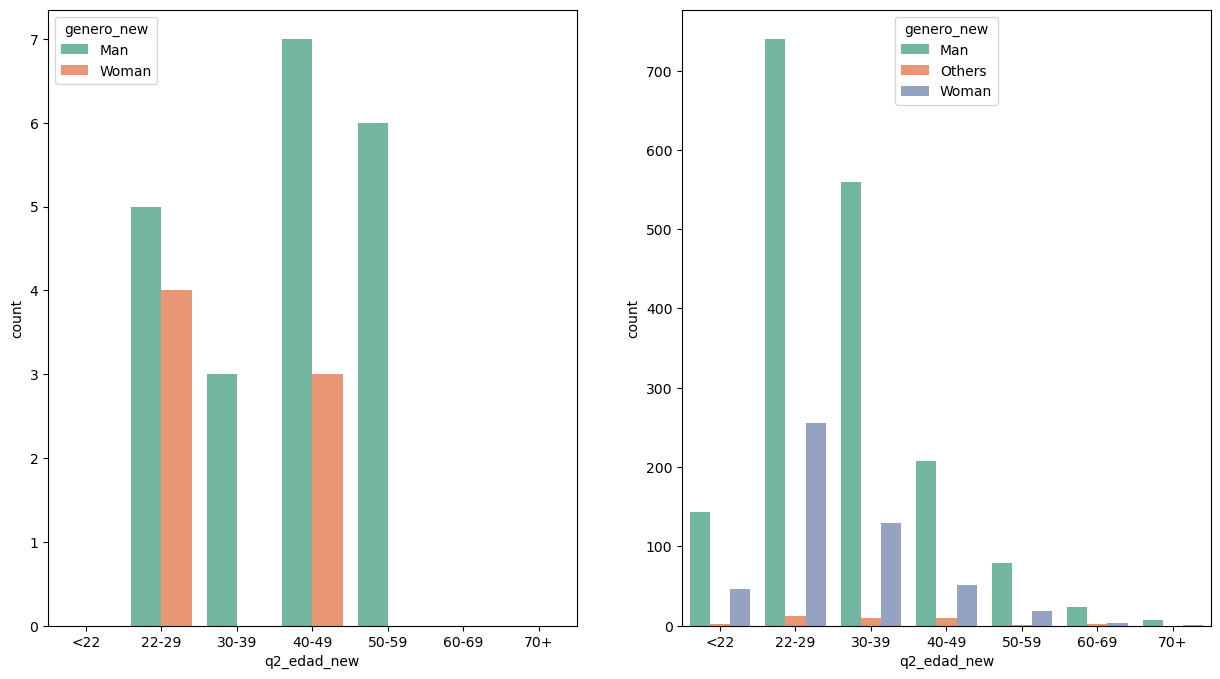

In [96]:
fig, ax = plt.subplots(1,2, figsize = (15,8))

sns.countplot(x='q2_edad_new', data= df_españa_final, ax=ax[0], hue = 'genero_new', palette = 'Set2',
order=['<22','22-29', '30-39', '40-49', '50-59', '60-69', '70+'])
sns.countplot(x="q2_edad_new", data=df_analista, ax=ax[1], hue = 'genero_new', palette = 'Set2',
order=['<22','22-29', '30-39', '40-49', '50-59', '60-69', '70+'])
plt.legend

fig.show()




In [33]:
df_analista.columns

Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'genero_new'],
      dtype='object')

In [39]:
df_analista['genero_new'].unique()

array(['Man', 'Others', 'Woman'], dtype=object)

In [40]:
df_analista_mujeres = df_analista[df_analista['genero_new'] != 'Man']

2.

In [98]:
df_analista.columns

Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'genero_new', 'edad_new', 'q2_edad_new'],
      dtype='object')

  # ¿Cuál es la educación y el cargo que ocupan en el mundo Tech? y ¿cuál de España y países?

## Para analistas

/tmp/ipykernel_67462/3302868080.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


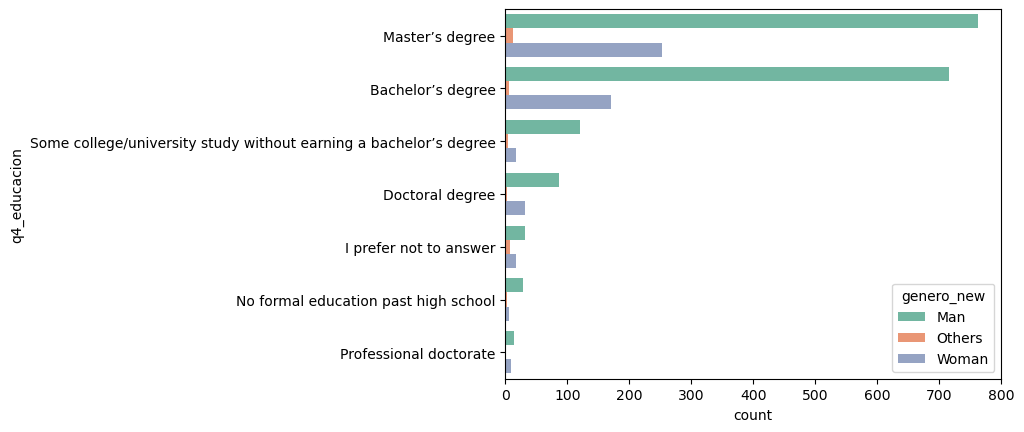

In [103]:

sns.countplot(y='q4_educacion', data= df_analista, hue = 'genero_new', palette = 'Set2', order = df_analista['q4_educacion'].value_counts().index );

fig.show()


## Para el total (no hay casi cambios)

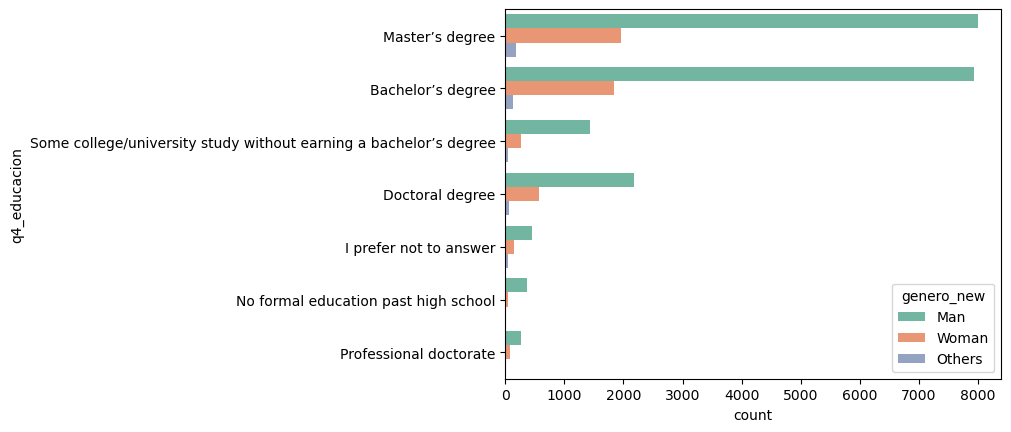

In [104]:
sns.countplot(y='q4_educacion', data= df_perfil, hue = 'genero_new', palette = 'Set2', order = df_analista['q4_educacion'].value_counts().index);

## Mujeres analistas

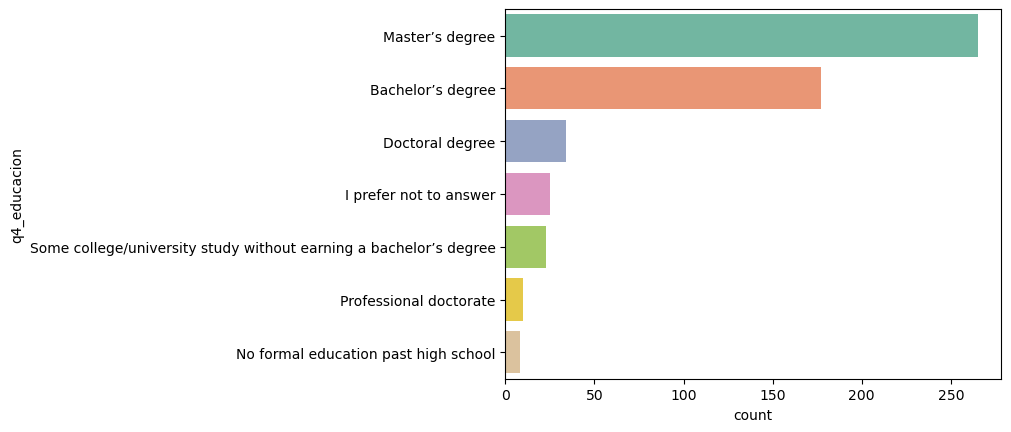

In [105]:
sns.countplot(y='q4_educacion', data= df_analista_mujeres, palette = 'Set2', order = df_analista_mujeres['q4_educacion'].value_counts().index);

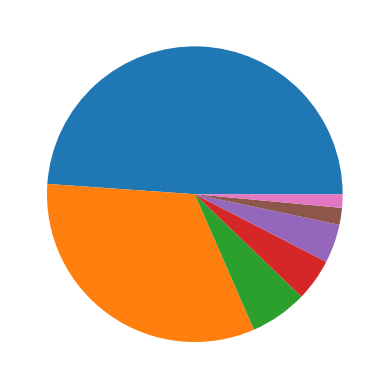

In [106]:

# create data: an array of values
size_of_groups= df_analista_mujeres['q4_educacion'].value_counts()

# Create a pieplot
plt.pie(size_of_groups)
plt.show()

In [133]:
educ = df_analista_mujeres['q4_educacion'].value_counts().reset_index()
educ

,index,q4_educacion
0,Master’s degree,265
1,Bachelor’s degree,177
2,Doctoral degree,34
3,I prefer not to answer,25
4,Some college/university study without earning ...,23
5,Professional doctorate,10
6,No formal education past high school,8


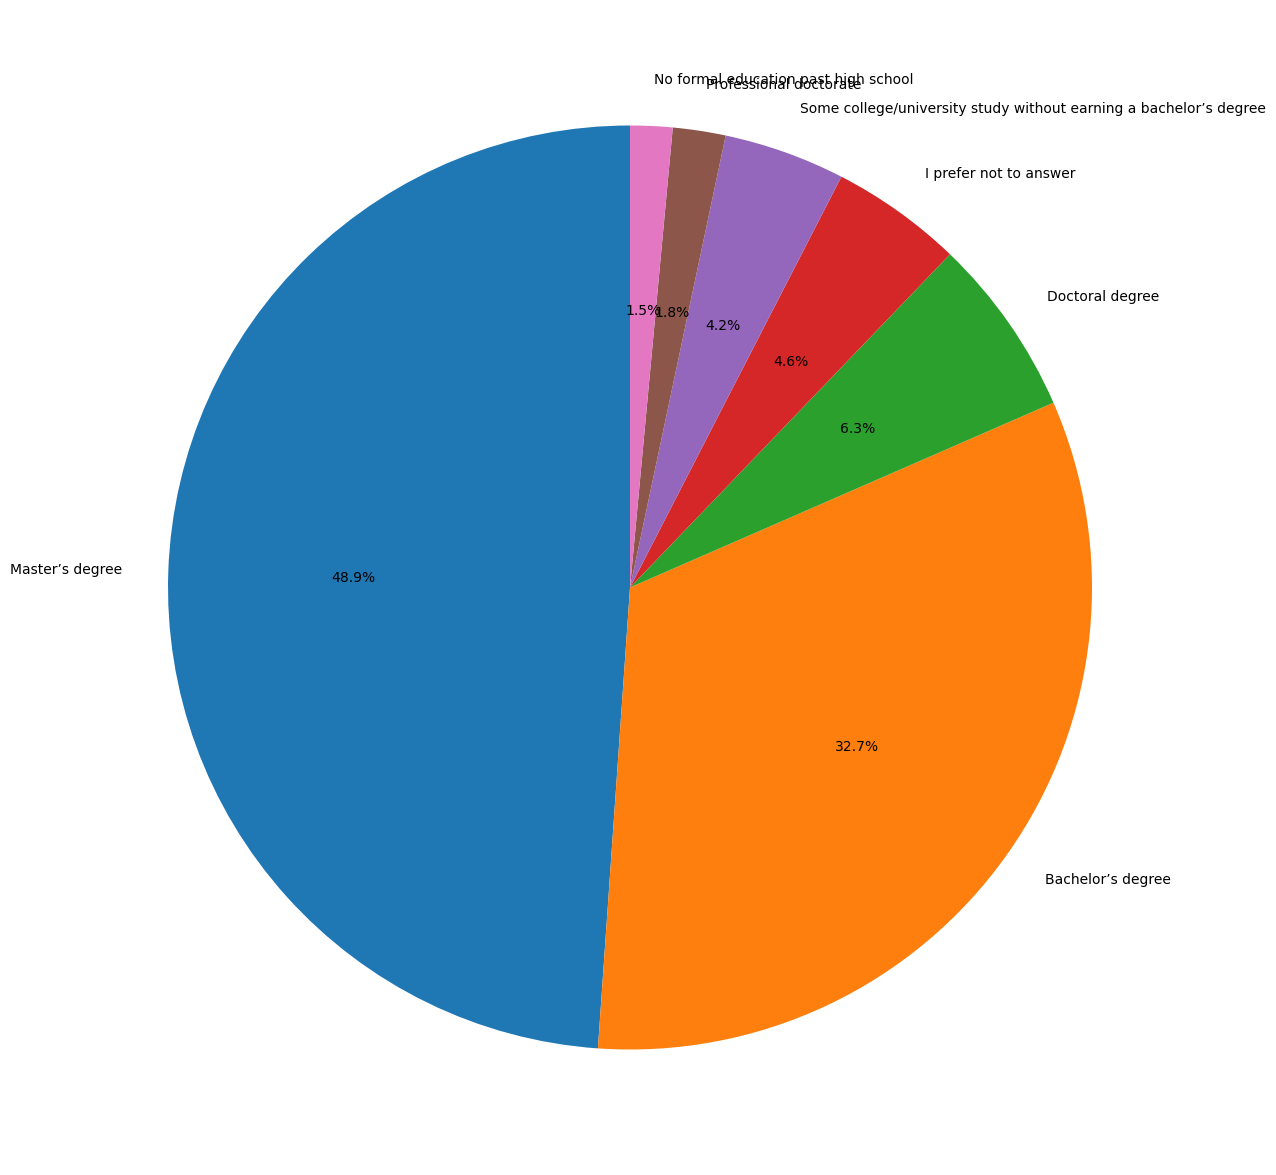

In [138]:
fig1, ax1 = plt.subplots(figsize = (15,15))
ax1.pie(educ['q4_educacion'], labels= educ['index'], autopct='%1.1f%%',
        shadow=False, startangle=90);

In [107]:
df_analista_mujeres['q4_educacion'].value_counts()

Master’s degree                                                      265
Bachelor’s degree                                                    177
Doctoral degree                                                       34
I prefer not to answer                                                25
Some college/university study without earning a bachelor’s degree     23
Professional doctorate                                                10
No formal education past high school                                   8
Name: q4_educacion, dtype: int64

In [118]:
df_analista.groupby("q4_educacion")["genero_new"].count().sort_values(ascending=False)


q4_educacion
Master’s degree                                                      1027
Bachelor’s degree                                                     893
Some college/university study without earning a bachelor’s degree     144
Doctoral degree                                                       120
I prefer not to answer                                                 56
No formal education past high school                                   37
Professional doctorate                                                 24
Name: genero_new, dtype: int64

In [122]:
df_analista.groupby(["q4_educacion", "genero_new"]).size().reset_index(name = 'count')


,q4_educacion,genero_new,count
0,Bachelor’s degree,Man,716
1,Bachelor’s degree,Others,6
2,Bachelor’s degree,Woman,171
3,Doctoral degree,Man,86
4,Doctoral degree,Others,3
5,Doctoral degree,Woman,31
6,I prefer not to answer,Man,31
7,I prefer not to answer,Others,7
8,I prefer not to answer,Woman,18
9,Master’s degree,Man,762


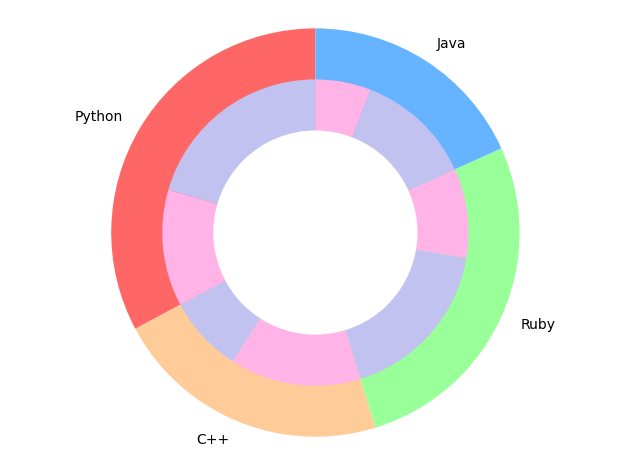

In [123]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = ['Python', 'C++', 'Ruby', 'Java']
sizes = [504, 337, 415, 280]
labels_gender = ['Man','Woman','Man','Woman','Man','Woman','Man','Woman']
sizes_gender = [315,189,125,212,270,145,190,90]
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()